In [62]:
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

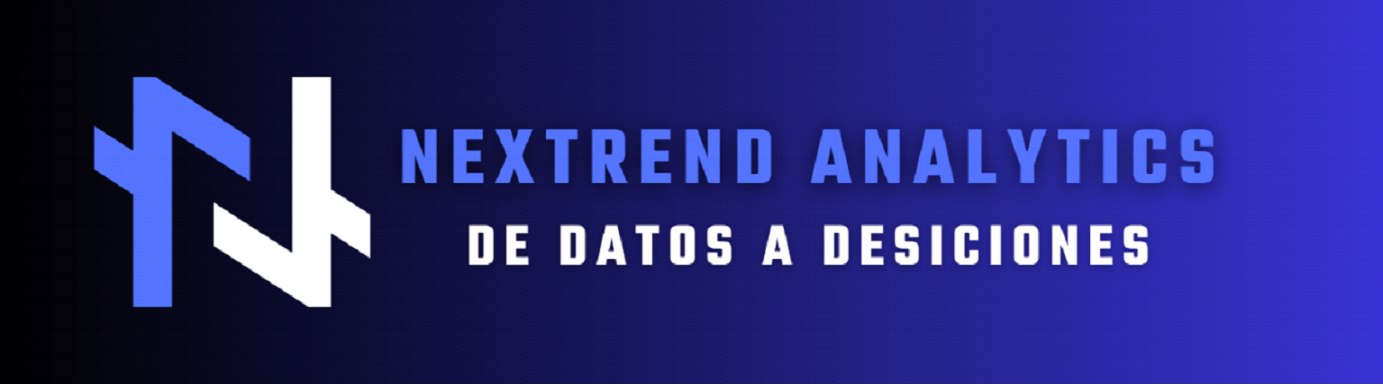

In [2]:
Image("D:/HENRY/ProyectoFinal/Imagenes/Nextrend.png")

# NexTrend Preliminar Exploratory Data Analysis 

### Introducción

En el siguiente análisis exploratorio de datos, observaremos los datos tal cual los obtuvimos (denominado "en crudo"), para poder realizar los pasos siguientes( ETL, EDA final, KPI's, etc), y así poder concretar la formación inicial de nuestros datos principales.
Como sabemos, tenemos la base de datos de Yelp! y de Google Maps, los cuales vamos a mostrar a continuación para su posterior proceso de selección, continuando con ETL, EDA final (con los datos seleccionados), los KPI y datos extras que iremos recopilando a futuro.


In [3]:
import pandas as pd 

In [4]:
df = pd.read_json('checkin.json', lines=True)

In [5]:
df


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,"2013-03-23 16:22:47, 2013-04-07 02:03:12, 2013..."
131926,zznZqH9CiAznbkV6fXyHWA,2021-06-12 01:16:12
131927,zzu6_r3DxBJuXcjnOYVdTw,"2011-05-24 01:35:13, 2012-01-01 23:44:33, 2012..."
131928,zzw66H6hVjXQEt0Js3Mo4A,"2016-12-03 23:33:26, 2018-12-02 19:08:45"


In [6]:
duplicates = df.duplicated()
print(duplicates.sum())

0


In [7]:
df.isna().sum()

business_id    0
date           0
dtype: int64

Podemos observar en el siguiente dataframe de Yelp!, llamado checkin.json, que no poseemos datos nulos, éste dataframe nos especifíca la fecha de ingreso del negocio ubicado por "Businees_id" y "date" respecto a la fecha de cada negocio


In [8]:
df1 = pd.read_json('D:/HENRY/ProyectoFinal/review.json',lines=True)

In [9]:
df1

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
6990275,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5,1,2,1,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20
6990276,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA,5,2,1,2,"This spot offers a great, affordable east week...",2021-03-31 16:55:10
6990277,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4,1,0,0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30
6990278,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5,1,0,0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27


In [10]:
df1.isna().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

## Acá podemos observar la cantidad de usuarios duplicados, lo cual refiere a que hubo varias reseñas por usuario, llegando a la suma de 5 millones

In [11]:
duplicates = df1.duplicated('user_id')
print(duplicates.sum())

5002351


### Observamos gráficamente la cantidad de reseñas duplicadas y las únicas 

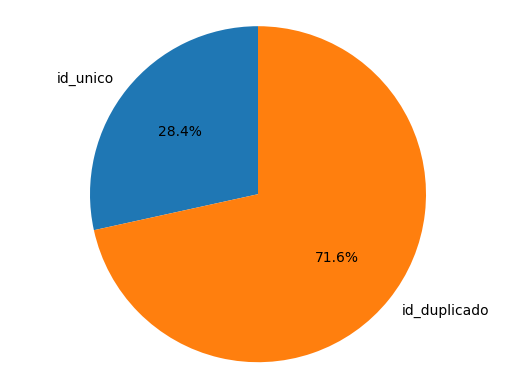

In [12]:
# Calcular los user_id únicos y duplicados
ids_unicos = df1['user_id'].nunique()
ids_duplicados = df1['user_id'].duplicated().sum()
# Crear los datos para el gráfico
labels = ['id_unico', 'id_duplicado']
sizes = [ids_unicos, ids_duplicados]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  
plt.show()

### Como bien observamos, se define en un 71.6% la cantidad de usuarios que realizaron más de una reseña, siendo el 28.4% que sólo realizó una única reseña por comercio 

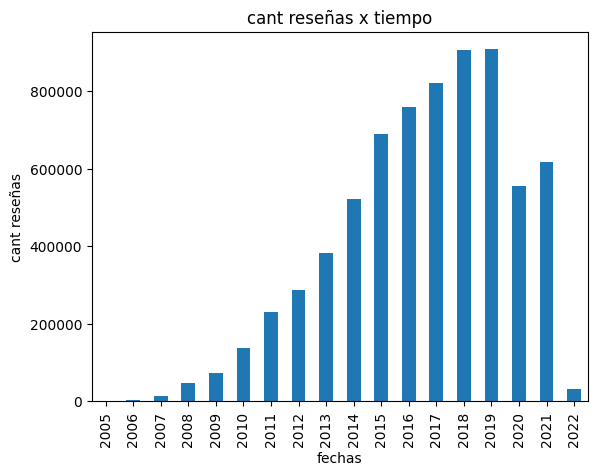

In [13]:
df1['date'] = pd.to_datetime(df1['date'])

cant_reseñas = df1.groupby(df1['date'].dt.year).size()
cant_reseñas.plot(kind='bar')
plt.xlabel('fechas')
plt.ylabel('cant reseñas')
plt.title('cant reseñas x tiempo')
plt.show()

Podemos observar que a lo largo de los años obtuvimos una crecida de aproximadamente 600000 reseñas entre finales de 2011 y 2019, bajando drásticamente en 2020, atribuimos ésto a que el aislamiento social provocado por el covid redujo la cantidad de salidas de la gente, evitando de ésta manera obtener reseñas que sean útiles ya que el usuario se enfocaba en visitar el lugar y a partir de todas las variables presentadas a la hora de solicitar el servicio, dejaba su reseña para futuros clientes de el establecimiento en cuestión, aunque vemos una drástica caida para 2022, quizá podamos asociarlo a la falta de datos adicionales en nuestro dataset.

### Una vez analizado esto, procederemos a realizar un análisis de sentimiento basado en regresión logística en éste dataset para observar la cantidad de reseñas negativas o positivas por usuario, tengamos en cuenta que las reseñas superiores a 3 estrellas denotarán una calificación positiva, y las reseñas inferiores a 3 estrellas una negativa 


In [14]:
# Crear una nueva columna 'sentiment' que es 'positive' si 'stars' es 4 o más, y 'negative' en caso contrario
df1['sentiment'] = ['positive' if x >= 4 else 'negative' for x in df1['stars']]

# Ver las primeras filas del DataFrame para verificar que la nueva columna se ha añadido correctamente
print(df1.head())

                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0      3       0      0     0   
1      5       1      0     1   
2      3       0      0     0   
3      5       1      0     1   
4      4       1      0     1   

                                                text                date  \
0  If you decide to eat here, just be aware it is... 2018-07-07 22:09:11   
1  I've taken a lot of spin classes over the year... 2012-01-03 15:28:18   
2  Family diner. Had the buffet. Eclectic assortm... 2014-02-05 20:30:30   
3  Wow!  Yummy, different,  delici

creamos los conjuntos de entrenamiento del modelo:

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df1['text'], df1['sentiment'], test_size=0.2, random_state=42)

entrenamos el modelo

In [16]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)

In [17]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
predictions = model.predict(vectorizer.transform(X_test))
print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.917418186395967


Obtuvimos una precisión en las predicciones del 90% respecto al modelo, con lo cual procedemos a realizar un grafico comparativo de reseñas positivas vs negativas

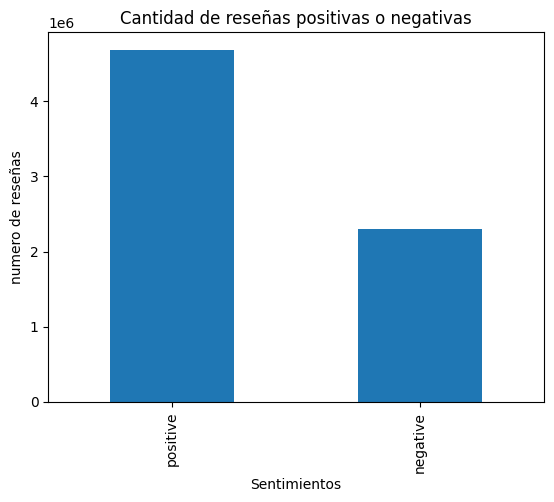

In [19]:
Contador_sentimientos = df1['sentiment'].value_counts()

Contador_sentimientos.plot(kind='bar')

plt.xlabel('Sentimientos')
plt.ylabel('numero de reseñas')
plt.title('Cantidad de reseñas positivas o negativas')
plt.show()

Podemos observar en general, que las reseñas en éste dataset son más positivas que negativas gracias a nuestra nueva columna añadida llamada "sentiment" la cual proviene del modelo de regresión el cual apuntó un 90% de precisión en cuanto a traduccion de cadenas de texto refiere


Proseguimos con el siguiente dataset.

In [20]:
df2 = pd.read_json('tip.json',lines=True)

In [21]:
df2

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0
...,...,...,...,...,...
908910,eYodOTF8pkqKPzHkcxZs-Q,3lHTewuKFt5IImbXJoFeDQ,Disappointed in one of your managers.,2021-09-11 19:18:57,0
908911,1uxtQAuJ2T5Xwa_wp7kUnA,OaGf0Dp56ARhQwIDT90w_g,Great food and service.,2021-10-30 11:54:36,0
908912,v48Spe6WEpqehsF2xQADpg,hYnMeAO77RGyTtIzUSKYzQ,Love their Cubans!!,2021-11-05 13:18:56,0
908913,ckqKGM2hl7I9Chp5IpAhkw,s2eyoTuJrcP7I_XyjdhUHQ,Great pizza great price,2021-11-20 16:11:44,0


en el siguiente dataset "tips.json" observamos que los tips son más cortos que las reseñas completas que un usuario puede dejar de un establecimiento, ayudando asi a los usuarios a conectar más rápidamente con lugares de su interés, la columna "compliment_count" refiere a la cantidad de cumplidos que recibió dicho tip

éste dataset no posee datos nulos, ni duplicados, a excepcion quizá de que se duplique el usuario, ya que una persona por ejemplo "x1" puede dejar varias reseñas en diferentes lugares que visitó


***Pasamos al siguiente dataset***

In [22]:
df3 = pd.read_parquet('user.parquet')

In [23]:
df3.head(3)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18


In [24]:
df3.isna().sum()

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

En este dataset podemos observar el usuario en Yelp!, el cual muestra desde cuándo el usuario es miembro de yelp, qué años fue usuario élite de la página, los id's de amigos del usuario, la cantidad de fans o seguidores que posee el usuario, y una cantidad de columnas de diferentes cumplidos que posee el usuario, cumplidos por sus reseñas, por fotos, por su perfil, y más.
Éste dataset no cuenta con datos nulos ni duplicados

In [25]:
duplicates = df3.duplicated('user_id')
print(duplicates.sum())

117700


In [26]:
df4 = pd.read_csv('archivopkl.csv')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18416\2132515373.py:1: DtypeWarning: Columns (15,16,17,18,19,20,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv('archivopkl.csv')


In [27]:
df4

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,...,state.1,postal_code.1,latitude.1,longitude.1,stars.1,review_count.1,is_open.1,attributes.1,categories.1,hours.1
0,0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,IN,T6J 5H2,53.468419,-113.492054,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150342,150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,DE,37204,36.115118,-86.766925,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150343,150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,AB,46250,39.908707,-86.065088,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150344,150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,AB,62025,38.782351,-89.950558,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df4 = df4.drop(columns=['Unnamed: 0'])


### Utilizamos la extensión Data Wrangler para eliminar las columnas duplicadas

In [29]:

def clean_data(df4):
    # Drop columns: 'business_id.1', 'address.1' and 12 other columns
    df4 = df4.drop(columns=['business_id.1', 'address.1', 'name.1', 'state.1', 'city.1', 'postal_code.1', 'latitude.1', 'longitude.1', 'stars.1', 'review_count.1', 'is_open.1', 'attributes.1', 'categories.1', 'hours.1'])
    return df4

df4 = clean_data(df4.copy())
df4.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [51]:
df4

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,IN,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,DE,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,AB,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",NaN
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,AB,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': ""{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


In [52]:
df4.isna().sum()

business_id         0
name                0
address          5127
city                0
state               3
postal_code        73
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories          0
hours           23223
dtype: int64

# Rellenamos las filas de nulos para observar las categorias de los locales, así podemos definir el alcance del proyecto


In [53]:
df4['categories'] = df4['categories'].fillna('Nodata')

In [33]:
import pandas as pd
from collections import Counter

def count_most_common_words(df, column):

    # Split the categories on commas, then join all rows in the column
    text = ' '.join(df4[column].str.split(',').sum())

    # Split the text into words
    words = text.split()

    # Count the occurrences of each word
    counter = Counter(words)

    # Get the 10 most common words
    most_common_words = counter.most_common(10)

    return most_common_words

### Podemos observar las categorías más repetidas 

In [34]:
most_common_words = count_most_common_words(df4, 'categories')
print(most_common_words)

[('&', 108359), ('Services', 56156), ('Restaurants', 52343), ('Food', 43813), ('Shopping', 24858), ('Home', 24169), ('Bars', 21022), ('Spas', 17070), ('Beauty', 15836), ('American', 15046)]


# Seleccionamos solo los locales que sean "Bares" dentro de las categorias y las guardamos en un dataframe


In [54]:
df5BARES = df4[df4['categories'].str.contains("Bars", na=False, case=False)]

In [55]:
df5BARES

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,TN,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': ""u'full_bar'"", '...","Pubs, Restaurants, Italian, Bars, American (Tr...",NaN
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,IN,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
20,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,10359 104 Street NW,Edmonton,LA,T5J 1B9,53.546045,-113.499169,4.0,40,0,"{'OutdoorSeating': 'False', 'Caters': 'True', ...","Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ..."
28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
47,lk9IwjZXqUMqqOhM774DtQ,Caviar & Bananas,2031 Broadway,Nashville,PA,37203,36.148371,-86.798895,3.5,159,0,"{'RestaurantsTakeOut': 'True', 'RestaurantsRes...","Coffee & Tea, Restaurants, Wine Bars, Bars, Ni...","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150276,Rn3DtOiuJtc3whFySWXs5Q,Japanese Village,2940 Calgary Trail NW,Edmonton,PA,T6J 7C2,53.463917,-113.494702,3.0,35,1,"{'RestaurantsAttire': ""u'casual'"", 'NoiseLevel...","Japanese, Restaurants, Steakhouses, Sushi Bars","{'Monday': '0:0-0:0', 'Tuesday': '17:0-22:0', ..."
150291,-R9t30RvsG-Rtiq63yuEmg,Crescent No Lawyers Bar-Grill,5500 W Franklin Rd,Boise,IN,83706,43.603368,-116.250063,2.5,55,0,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","American (Traditional), Nightlife, Bars, Resta...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ..."
150292,esBGrrmuZzSiECyRBoKvvA,Colony Grill - St. Petersburg,670 Central Ave,St. Petersburg,FL,33701,27.770872,-82.643069,4.5,38,1,"{'RestaurantsPriceRange2': '2', 'RestaurantsAt...","Bars, Beer Bar, Nightlife, Wine Bars, Pizza, R...","{'Monday': '11:30-23:0', 'Tuesday': '11:30-23:..."
150323,w_4xUt-1AyY2ZwKtnjW0Xg,Bittercreek Alehouse,246 N 8th St,Boise,PA,83702,43.616590,-116.202383,4.5,998,1,"{'BikeParking': 'True', 'Alcohol': ""u'full_bar...","Bars, Gastropubs, Sandwiches, Nightlife, Resta...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."


In [37]:
filtered_data = df5BARES[(df5BARES['stars'].astype(int) == 5)]
print(filtered_data)

                   business_id                                  name  \
444     _WRe3ql2DI_h3htr77Siew                            The Office   
864     yUcMPv-B9gCUUNT-GUiJbw                     The flagpole Nola   
1018    _Oksx3ALgKLRVxeAR8l_qA             V-Trap Kitchen and Lounge   
1038    o05ngJ6BY1rztemFazViBw                  The Mona Lisa Lounge   
1331    IazLGcO9aggJnMMa_5UO1Q  Kimberton Whole Foods - Collegeville   
...                        ...                                   ...   
149067  SK8mugK0lNcb0okR5pQ8pQ         St Yared Ethiopian Restaurant   
149077  OVMQ5w9Qw96OfZ0e5nZtVA            Pure Kitchen Organic Vegan   
149592  doLNBdsPc2xO_nDHV2UzLg                      Bikini Beach Bar   
149780  RmZ9CORyRONwfJYGrPPpbA           Jet City Espresso Hyde Park   
150264  Bo-GGwQNcLVwyKeYkbfAYg                           Vino Divino   

                    address           city state postal_code   latitude  \
444            248 W 1st St           Reno    FL       89501

In [38]:
filtered_data = df5BARES[df5BARES['state'].str.contains('FL', case=False) & (df5BARES['stars'].astype(int) == 5)]
print(filtered_data)

                   business_id                        name  \
444     _WRe3ql2DI_h3htr77Siew                  The Office   
7105    _AStgdcAhL_0GWrA52tLHg              Medusas On 4th   
7181    4jONpl2rUUJvt7UnNBOX4A                     Mr Wish   
7519    _JNRKX9qdBTHLKtAl7dbWg             Botanicals Nola   
8048    _D7QoWuQKMXk0mEE7r_Ftw              Chateau La VIn   
...                        ...                         ...   
137636  mVEqN8IPU-vCeKTXC5lsSQ              Kensington Pub   
138932  7qN3TW2RU89Q78iceR1R4g            Buzzy Coffee Co.   
143578  0stm_mH1j8AkUYYIdxx-7A              Smokers Choice   
148802  gkqfm6mTim9Rwopwjayc8w                  Five & 1/4   
149077  OVMQ5w9Qw96OfZ0e5nZtVA  Pure Kitchen Organic Vegan   

                        address           city state postal_code   latitude  \
444                248 W 1st St           Reno    FL       89501  39.524816   
7105              521 N 4th Ave         Tucson    FL       85705  32.228327   
7181        1265A 

### Realizamos, en base al alcance de nuestro proyecto, la verificación de los datos necesarios

In [56]:
filtered_data

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
444,_WRe3ql2DI_h3htr77Siew,The Office,248 W 1st St,Reno,FL,89501,39.524816,-119.816082,5.0,7,1,"{'WiFi': ""u'free'"", 'RestaurantsReservations':...","Nightlife, Lounges, Bars","{'Tuesday': '16:30-23:30', 'Wednesday': '16:30..."
7105,_AStgdcAhL_0GWrA52tLHg,Medusas On 4th,521 N 4th Ave,Tucson,FL,85705,32.228327,-110.965802,5.0,12,1,"{'Corkage': 'True', 'Smoking': ""u'outdoor'"", '...","Bars, Nightlife, Hookah Bars","{'Monday': '17:0-23:0', 'Tuesday': '17:0-23:0'..."
7181,4jONpl2rUUJvt7UnNBOX4A,Mr Wish,1265A Woodbourne Rd,Levittown,FL,19057,40.165586,-74.872635,5.0,20,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Bubble Tea, Juice Bars & Smoothies, Food",NaN
7519,_JNRKX9qdBTHLKtAl7dbWg,Botanicals Nola,3726 St Claude Ave,New Orleans,FL,70117,29.965873,-90.037503,5.0,25,1,"{'HasTV': 'False', 'DogsAllowed': 'False', 'Bi...","Health & Medical, Restaurants, Juice Bars & Sm...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."
8048,_D7QoWuQKMXk0mEE7r_Ftw,Chateau La VIn,119 S Main St,Columbia,FL,62236,38.442224,-90.199316,5.0,13,1,"{'BikeParking': 'True', 'NoiseLevel': ""'averag...","Beer, Wine & Spirits, Bars, Wineries, Food, Ni...","{'Wednesday': '17:0-21:0', 'Thursday': '17:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137636,mVEqN8IPU-vCeKTXC5lsSQ,Kensington Pub,2116 E Tioga St,Philadelphia,FL,19134,39.995567,-75.102530,5.0,9,1,"{'GoodForDancing': 'True', 'BusinessAcceptsCre...","Nightlife, Pubs, Restaurants, American (Tradit...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ..."
138932,7qN3TW2RU89Q78iceR1R4g,Buzzy Coffee Co.,120 E Market St,Indianapolis,FL,46204,39.768791,-86.155542,5.0,7,0,"{'Caters': 'True', 'BusinessAcceptsCreditCards...","Health & Medical, Health Markets, Coffee & Tea...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
143578,0stm_mH1j8AkUYYIdxx-7A,Smokers Choice,"729 N Green St, Ste 200",Brownsburg,FL,46112,39.854248,-86.392584,5.0,16,1,"{'RestaurantsGoodForGroups': 'True', 'BikePark...","Nightlife, Vape Shops, Bars, Tobacco Shops, Sh...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."
148802,gkqfm6mTim9Rwopwjayc8w,Five & 1/4,705 Anacapa St,Santa Barbara,FL,93101,34.419813,-119.697266,5.0,27,0,"{'RestaurantsReservations': 'False', 'BikePark...","Bars, Nightlife, Wine Bars","{'Thursday': '17:15-22:0', 'Friday': '17:15-22..."


### Rellenamos los campos vacíos con "NoData" (a tener en cuenta)

In [63]:
filtered_data['address'].fillna("NoData", inplace=True)
filtered_data['hours'].fillna("NoData", inplace=True)
filtered_data['attributes'].fillna("NoData", inplace=True)

In [64]:
filtered_data

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
444,_WRe3ql2DI_h3htr77Siew,The Office,248 W 1st St,Reno,FL,89501,39.524816,-119.816082,5.0,7,1,"{'WiFi': ""u'free'"", 'RestaurantsReservations':...","Nightlife, Lounges, Bars","{'Tuesday': '16:30-23:30', 'Wednesday': '16:30..."
7105,_AStgdcAhL_0GWrA52tLHg,Medusas On 4th,521 N 4th Ave,Tucson,FL,85705,32.228327,-110.965802,5.0,12,1,"{'Corkage': 'True', 'Smoking': ""u'outdoor'"", '...","Bars, Nightlife, Hookah Bars","{'Monday': '17:0-23:0', 'Tuesday': '17:0-23:0'..."
7181,4jONpl2rUUJvt7UnNBOX4A,Mr Wish,1265A Woodbourne Rd,Levittown,FL,19057,40.165586,-74.872635,5.0,20,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Bubble Tea, Juice Bars & Smoothies, Food",NoData
7519,_JNRKX9qdBTHLKtAl7dbWg,Botanicals Nola,3726 St Claude Ave,New Orleans,FL,70117,29.965873,-90.037503,5.0,25,1,"{'HasTV': 'False', 'DogsAllowed': 'False', 'Bi...","Health & Medical, Restaurants, Juice Bars & Sm...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."
8048,_D7QoWuQKMXk0mEE7r_Ftw,Chateau La VIn,119 S Main St,Columbia,FL,62236,38.442224,-90.199316,5.0,13,1,"{'BikeParking': 'True', 'NoiseLevel': ""'averag...","Beer, Wine & Spirits, Bars, Wineries, Food, Ni...","{'Wednesday': '17:0-21:0', 'Thursday': '17:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137636,mVEqN8IPU-vCeKTXC5lsSQ,Kensington Pub,2116 E Tioga St,Philadelphia,FL,19134,39.995567,-75.102530,5.0,9,1,"{'GoodForDancing': 'True', 'BusinessAcceptsCre...","Nightlife, Pubs, Restaurants, American (Tradit...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ..."
138932,7qN3TW2RU89Q78iceR1R4g,Buzzy Coffee Co.,120 E Market St,Indianapolis,FL,46204,39.768791,-86.155542,5.0,7,0,"{'Caters': 'True', 'BusinessAcceptsCreditCards...","Health & Medical, Health Markets, Coffee & Tea...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
143578,0stm_mH1j8AkUYYIdxx-7A,Smokers Choice,"729 N Green St, Ste 200",Brownsburg,FL,46112,39.854248,-86.392584,5.0,16,1,"{'RestaurantsGoodForGroups': 'True', 'BikePark...","Nightlife, Vape Shops, Bars, Tobacco Shops, Sh...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."
148802,gkqfm6mTim9Rwopwjayc8w,Five & 1/4,705 Anacapa St,Santa Barbara,FL,93101,34.419813,-119.697266,5.0,27,0,"{'RestaurantsReservations': 'False', 'BikePark...","Bars, Nightlife, Wine Bars","{'Thursday': '17:15-22:0', 'Friday': '17:15-22..."


# Metadata-Sitios, las reseñas ubicadas en Google

In [39]:
df6metadata = pd.read_json("metadata-sitios/1.json",lines=True)

In [40]:
df6metadata

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274996,Maven Realty,"Maven Realty, 2180 McMillan Ave #71672, North ...",0x88fe64e7daceaaab:0x101c046dcadcc9c3,None,32.857737,-79.985839,[Real estate agency],4.9,15,None,"[[Saturday, Open 24 hours], [Sunday, Open 24 h...",None,Open 24 hours,"[0x88fe657160ccc965:0xc675c849dc6d96ba, 0x88fe...",https://www.google.com/maps/place//data=!4m2!3...
274997,Stone Castle Fence,"Stone Castle Fence, 124 Cypress Gardens Rd, Mo...",0x88fe59f4602c95fd:0x57e2b1904d9e6949,None,33.089951,-80.078021,"[Fence contractor, Construction company, Contr...",4.0,18,None,"[[Saturday, Closed], [Sunday, Closed], [Monday...",None,Closed ⋅ Opens 7AM Mon,"[0x88fe8d1444299bbb:0x91daa2e82c59ea94, 0x88fe...",https://www.google.com/maps/place//data=!4m2!3...
274998,Health Insurance Solutions Team,"Health Insurance Solutions Team, 6650 Rivers A...",0x88fe71f9617c15e1:0x89518c1d251706bf,None,32.918858,-80.027952,[Health insurance agency],5.0,18,None,"[[Saturday, Closed], [Sunday, Closed], [Monday...","{'Service options': ['Online appointments'], '...",Closed ⋅ Opens 8AM Mon,"[0x88fe6fe45b8d3f15:0x41d4b940a40b246a, 0x88fe...",https://www.google.com/maps/place//data=!4m2!3...
274999,Bernard Building Center,"Bernard Building Center, 27300 M-32, M-32, Hil...",0x4d34c7517d6e6e29:0x7fe553ee2f090cf0,None,45.056691,-83.894423,"[Building materials store, Electrical supply s...",4.7,25,None,"[[Saturday, 8AM–3PM], [Sunday, Closed], [Monda...","{'Service options': ['Curbside pickup', 'Deliv...",Closed ⋅ Opens 7:30AM Mon,"[0x4d335f6408d395d9:0xc20dea80d4c100d8, 0x4d34...",https://www.google.com/maps/place//data=!4m2!3...


Podemos observar que los archivos contenidos en la carpeta "metadata-sitios" de tipo .json, contienen el negocio, su ubicacion, las coordenadas, su categoria correspondiente, el promedio de rating (visitas de personas), cantidad de reviews, horario de apertura y cierre, locales relacionados,descripcion de el contenido del negocio y su correspondiente link de google para encontrar el lugar.

Analizando éstos dataset, todos tienen la misma cantidad de filas y columnas en común prácticamente, como dato relevante sería conveniente revisar ciertas columnas como "address" que contiene el nombre del local junto con la dirección, ciertas columnas con la mayoría de sus datos nulos, los cuales podrían ser proporcionados a través de webscrapping.


# Reviews por Estado

En ésta carpeta, podemos encontrar subcarpetas con archivos .json las cuales contienen las reviews por cada Estado del país, las cuales se podrán reducir posteriormente a este PEDA para una mejor determinación del alcance de nuestro proyecto (Por ejemplo seleccionar 3 estados diferentes)

In [41]:
df7reviews = pd.read_json("reviews-estados/review-California/1.json",lines=True)

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


In [42]:
df7reviews

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.089912e+20,Song Ro,1609909927056,5,Love there korean rice cake.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
1,1.112903e+20,Rafa Robles,1612849648663,5,Good very good,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
2,1.126404e+20,David Han,1583643882296,4,They make Korean traditional food very properly.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
3,1.174403e+20,Anthony Kim,1551938216355,5,Short ribs are very delicious.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
4,1.005808e+20,Mario Marzouk,1494910901933,5,Great food and prices the portions are large,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
...,...,...,...,...,...,...,...,...
149995,1.081939e+20,Raffi Khatchadourian,1583646462958,5,None,None,None,0x80c299484c7709cd:0x89510434231b14d4
149996,1.075762e+20,Noah Vincent Ford,1605055631573,5,None,None,None,0x80c299484c7709cd:0x89510434231b14d4
149997,1.008113e+20,David Karwaski,1597443113544,5,None,None,None,0x80c299484c7709cd:0x89510434231b14d4
149998,1.177078e+20,Reynalda Vargaz,1573479297751,5,None,None,None,0x80c299484c7709cd:0x89510434231b14d4


Podemos visualizar que los archivos .json contienen 150mil filas y 8 columnas respectivamente, las cuales nos muestran el ID del usuario, su respectivo nombre,  desconocemos a qué refiere la columna "time" ya que al realizar cálculos, no parece ser que sea una medida en segundos, horas, días o años que lleva el usuario realizando reseñas en google.
 Luego tenemos la columna rating, la cual posee la calificación del usuario respecto a "gmap_id" que debe ser el lugar que visitó recientemente, la columna "text" que contiene la reseña escrita, "pics" la cual debe contener imagenes del lugar, "resp" que puede que pertenezca a las respuestas que recibe la reseña del usuario.

# KPI 1: 


Muestra el promedio de puntuaciones en estrellas de los bares. El objetivo a medir del KPI sería mantenerse en 4 estrellas en comparación al año anterior, indicando el deseo por mantener altas calificaciones en promedio.


# KPI 2:


Ilustra el cumplimiento o no del aumento de a 1 estrella, en aquellos Bares que tienen máximo 3 en un trimestre en comparación al año anterior




# KPI 3:

 Evaluar la proporción de reseñas positivas respecto al total de reseñas. Un incremento del 15% con respecto al trimestre anterior refleja los esfuerzos constantes por elevar la satisfacción del cliente. Es imperativo que todo negocio que busque mejora en su rating, le brinde una buena atención a los clientes

In [43]:
df8metadata = pd.read_json("metadata-sitios/2.json",lines=True)

In [44]:
df8metadata

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,Glik's,"Glik's, 1405 W Main St, Gaylord, MI 49735",0x4d354f7b3ae7bef1:0x8d9fdcd2fd71eb10,Family-owned clothing chain offering trendy ca...,45.025578,-84.702644,"[Clothing store, Shoe store, Women's clothing ...",4.4,16,None,"[[Saturday, 10AM–8PM], [Sunday, 12–5PM], [Mond...","{'Service options': ['In-store pickup', 'In-st...",Open ⋅ Closes 8PM,"[0x4d3545876def64d9:0x9ce5f21fc27974d6, 0x4d35...",https://www.google.com/maps/place//data=!4m2!3...
2,Oscoda County Area Transit Authority (O-cats),"Oscoda County Area Transit Authority (O-cats),...",0x88208ef3441c45bb:0x8dd64d99a31de703,None,44.645621,-84.149766,[Handicapped transportation service],4.7,6,None,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x88208ef38622eed1:0xc6f564f43dcbeb30, 0x8820...",https://www.google.com/maps/place//data=!4m2!3...
3,Hickerson Floor & Tile Haus,"Hickerson Floor & Tile Haus, 2234 M-32, Gaylor...",0x4d35487e8d000561:0xdb6871623dbb10ef,None,45.028342,-84.719165,"[Flooring store, Carpet store, Rug store, Tile...",4.7,16,None,"[[Saturday, 9AM–3PM], [Sunday, Closed], [Monda...","{'Service options': ['In-store pickup', 'In-st...",Closed ⋅ Opens 9AM Mon,"[0x4d354f7bc740703b:0x804108d3b0032d71, 0x4d35...",https://www.google.com/maps/place//data=!4m2!3...
4,Beck Suzanne A MD,"Beck Suzanne A MD, 3502 22nd St, Lubbock, TX 7...",0x86fe72aa61be7aaf:0xb9f513a5f8e16a0b,None,33.575336,-101.890226,[Doctor],4.2,5,None,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x86fe0d58535f631b:0x487a281ef8b56aa8, 0x86fe...",https://www.google.com/maps/place//data=!4m2!3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274996,Quality Office Supply,"Quality Office Supply, 1024 Pierre Ave, Shreve...",0x8636cd40244e87ff:0x77d20dd0785ac2e6,None,32.501904,-93.763399,[Office supply store],5.0,2,None,None,{'Service options': ['In-store shopping']},None,"[0x8636cd313bf1647f:0x76911c0b131f6b39, 0x8636...",https://www.google.com/maps/place//data=!4m2!3...
274997,JV towing,"JV towing, 4975 W Adams Blvd, Los Angeles, CA ...",0x80c2b94b59d23239:0xc095fa9282871c12,None,34.032909,-118.349082,[Auto wrecker],5.0,1,None,"[[Tuesday, Open 24 hours], [Wednesday, Open 24...",None,Open 24 hours,None,https://www.google.com/maps/place//data=!4m2!3...
274998,"Sisom Osia, MD (Gateway Medical Center)","Sisom Osia, MD (Gateway Medical Center), 9628 ...",0x89b7bde343a53233:0x12fe2357bde85896,None,38.817388,-76.840270,[Doctor],4.7,188,None,"[[Tuesday, 9AM–5PM], [Wednesday, 9AM–5PM], [Th...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 9AM Wed,"[0x89b796bcdbba1335:0x3d57f7fb0ef52bb1, 0x89b7...",https://www.google.com/maps/place//data=!4m2!3...
274999,Rasa Floors,"Rasa Floors, 2833 Eisenhower St Suite 100, Car...",0x864c2f593c5116d3:0x913d556ce7012a2f,None,32.990436,-96.926784,[Flooring contractor],4.3,47,None,"[[Tuesday, 7AM–7PM], [Wednesday, 7AM–7PM], [Th...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 7PM,"[0x864c25f7faeb40c1:0x42ecb75804ecd9a3, 0x864c...",https://www.google.com/maps/place//data=!4m2!3...


In [45]:
df9metadata = pd.read_json("metadata-sitios/3.json",lines=True)

In [46]:
df9metadata

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,Bumatay Jewelers,"Bumatay Jewelers, 111 W Ocean Ave, Lompoc, CA ...",0x80ec19352387c3e9:0x682efad0552e6cd4,None,34.639202,-120.458455,"[Jeweler, Jewelry designer, Jewelry repair ser...",4.6,18,None,"[[Tuesday, 10AM–6PM], [Wednesday, 10AM–6PM], [...","{'Service options': ['In-store shopping', 'Del...",Open ⋅ Closes 6PM,"[0x80ec1eca0835fc71:0xad3849d064ca46e7, 0x80ec...",https://www.google.com/maps/place//data=!4m2!3...
2,Natura,"Natura, 10744 N Stemmons Fwy, Dallas, TX 75220",0x864e9d69978f66c9:0x419f97b120ab0988,None,32.873062,-96.896274,"[Interior plant service, Business to business ...",4.5,8,None,"[[Tuesday, 8AM–5PM], [Wednesday, 8AM–5PM], [Th...",None,Closes soon ⋅ 5PM ⋅ Opens 8AM Wed,"[0x864e9d4180fe40b3:0x5e0fd37713c254bd, 0x864c...",https://www.google.com/maps/place//data=!4m2!3...
3,Veterans Park,"Veterans Park, 6910 New York 5&20,, Bloomfield...",0x89d13b12eccb75e1:0x32b35c53a8cb1202,None,42.886783,-77.410820,[Recreation center],4.4,18,None,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x89d1388d4acc026f:0x30a872bfd0a4679d, 0x89d1...",https://www.google.com/maps/place//data=!4m2!3...
4,David Mac Donald Magician,"David Mac Donald Magician, 64 Plaza Ave, Renss...",0x89de09b96f7feb01:0x6617bbe4574de337,None,42.643592,-73.716346,[Magician],3.5,2,None,None,None,None,None,https://www.google.com/maps/place//data=!4m2!3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274996,St. John’s United Church of Christ,"St. John’s United Church of Christ, 302 N Mapl...",0x880b1b70e94fcdb1:0x560e8c9608512e9f,None,40.435873,-89.311683,"[United Church of Christ, Church]",4.6,5,None,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x880b1b9d2acd4993:0xcc6aefffbc1d1c11, 0x880b...",https://www.google.com/maps/place//data=!4m2!3...
274997,Do Overs,"Do Overs, 542 Cedar St, Monticello, MN 55362",0x52b49e3bd4a527b9:0xe3d8bdd9dc24ab0d,None,45.301320,-93.794515,"[Clothing store, Consignment shop, Thrift stor...",3.6,7,None,"[[Saturday, 10AM–5PM], [Sunday, Closed], [Mond...","{'Offerings': ['Women's clothing'], 'Planning'...",Permanently closed,[0x52b3693f5b89a4cf:0xa1e6177894f0a370],https://www.google.com/maps/place//data=!4m2!3...
274998,Appalachian Nails & Co,"Appalachian Nails & Co, 324 NC-105 Extension S...",0x8850fbaab88e4e19:0x8a07fd272beb2090,None,36.213141,-81.669039,[Nail salon],4.8,217,None,"[[Saturday, 10AM–6PM], [Sunday, Closed], [Mond...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 6PM,"[0x8850fa3c5f6c2a83:0x7ce80259583a9ff7, 0x8850...",https://www.google.com/maps/place//data=!4m2!3...
274999,Wildcat Lake,"Wildcat Lake, North Carolina 28604",0x885092bc81c140a5:0xffe17cf861369d26,None,36.147987,-81.882187,[Lake],4.5,53,None,None,None,None,None,https://www.google.com/maps/place/North+Caroli...


In [47]:
df10metadata = pd.read_json("metadata-sitios/4.json",lines=True)

In [48]:
df10metadata

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,Pittsburgh Circus School,"Pittsburgh Circus School, 6800 Brighton Rd 2nd...",0x8834f5bb828394c3:0x8c8cd12a81fcc81a,None,40.505382,-80.078735,"[Gymnastics center, Circus]",3.9,16,None,"[[Saturday, 9AM–1PM], [Sunday, 6–9PM], [Monday...",{'From the business': ['Identifies as women-le...,Closed ⋅ Opens 6PM Sun,None,https://www.google.com/maps/place//data=!4m2!3...
2,Freedom ElecTech,"Freedom ElecTech, 521 NC-105 Extension #3, Boo...",0x8850fa407ebe7c75:0x4e79ef72c51b2f64,None,36.210733,-81.666781,"[Electrician, Audio visual consultant, Audio v...",4.5,8,None,"[[Saturday, 10AM–2PM], [Sunday, Closed], [Mond...",None,Closed ⋅ Opens 8AM Mon,"[0x8850fa308494fc8d:0x4f7268d52953ea5c, 0x8850...",https://www.google.com/maps/place//data=!4m2!3...
3,Dietz Floral & Gifts,"Dietz Floral & Gifts, 549 Lincoln Ave, Bellevu...",0x8834f503bec584f3:0x4dcab098bbb36236,None,40.496279,-80.057246,"[Florist, Gift basket store, Gift shop]",4.3,38,None,"[[Saturday, 9AM–4PM], [Sunday, Closed], [Monda...","{'Service options': ['Same-day delivery'], 'Ac...",Permanently closed,"[0x8834f3c5bb960cc3:0x8a96adaca50087f5, 0x8834...",https://www.google.com/maps/place//data=!4m2!3...
4,Beech Mountain Community Center,"Beech Mountain Community Center, 60 Flat Sprin...",0x88508c6d4a58520f:0x8bea3f3791d009b5,None,36.237188,-81.930071,[Auditorium],4.6,5,None,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x88508ce75fb3884b:0x820fd05a10d7602a, 0x8850...",https://www.google.com/maps/place//data=!4m2!3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274996,HUDSPETH DIESEL LLC,"HUDSPETH DIESEL LLC, 301 S 6th St, Gurdon, AR ...",0x86330322cc8f5c7f:0xd6a3e830c9959523,None,33.914424,-93.147718,"[Diesel engine repair service, Auto wrecker, M...",4.5,25,None,"[[Saturday, Closed], [Sunday, Closed], [Monday...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 8AM Mon,"[0x86331b8c8f8224f7:0x9544816081c412c9, 0x8633...",https://www.google.com/maps/place//data=!4m2!3...
274997,Carrie Street Church of God,"Carrie Street Church of God, Carrie St, Gurdon...",0x86330316becbcd23:0xcac397ed0aa34684,None,33.908360,-93.151610,[Church],4.5,2,None,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x8633031683e88b7b:0xef1541d76ea5de6b, 0x8633...",https://www.google.com/maps/place//data=!4m2!3...
274998,Bank of Delight,"Bank of Delight, 600 East Smith, Gurdon, AR 71743",0x8633033d4beddac3:0xce4f20c7eda3ff33,None,33.913723,-93.148104,[Bank],5.0,1,None,"[[Saturday, Closed], [Sunday, Closed], [Monday...","{'Service options': ['Drive-through'], 'Access...",Closed ⋅ Opens 8:30AM Mon,"[0x8633033cbd99570f:0xa880a34725d07bbb, 0x8633...",https://www.google.com/maps/place//data=!4m2!3...
274999,Ashley & Sorters,"Ashley & Sorters, Hot Springs, AR 71913",0x87cd2b1d2ab4f34d:0xd59f275ff16ffa99,None,34.503700,-93.055179,[Home builder],5.0,1,None,None,None,None,"[0x87cd2b595147f1c5:0x3d27a5b4b0c1823d, 0x87cd...",https://www.google.com/maps/place//data=!4m2!3...


In [49]:
df11metadata = pd.read_json("metadata-sitios/5.json",lines=True)

In [50]:
df11metadata

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,"Elite Exteriors Roofing & Restoration, Inc.",None,0x87ccd3297badbb3b:0x18e80a5c9de19f16,None,45.597481,-127.269699,"[Roofing contractor, Construction company, Ser...",4.2,18,None,"[[Saturday, Closed], [Sunday, Closed], [Monday...",None,Closed ⋅ Opens 8AM Mon,"[0x87ccd52d7b36dacd:0x6bb2ca2dd53edcd0, 0x8632...",https://www.google.com/maps/place//data=!4m2!3...
2,Harper's Plumbing,"Harper's Plumbing, 400 S Front St, Gurdon, AR ...",0x86330338d4921e25:0x4af02600facc4465,None,33.918058,-93.155579,[Plumber],5.0,1,None,None,None,None,"[0x86331ef6285a3bf7:0xb56dcfd2525cc4f8, 0x8632...",https://www.google.com/maps/place//data=!4m2!3...
3,Wylie Glass and Salvage Inc,"Wylie Glass and Salvage Inc, 1501 W 3rd St, Ho...",0x86338365e22e037b:0xf2ec124da3ecdfe6,None,33.664719,-93.606783,"[Salvage yard, Auto glass shop, Auto parts sto...",4.3,16,None,"[[Saturday, Closed], [Sunday, Closed], [Monday...",{'Health & safety': ['Staff required to disinf...,Closed ⋅ Opens 8AM Mon,"[0x86338340e5d5330b:0x51f8102ff3834ae5, 0x87d2...",https://www.google.com/maps/place//data=!4m2!3...
4,Wholesale Beauty & Convenience,"Wholesale Beauty & Convenience, 1750 Pine St, ...",0x8632dfdb9faed6a3:0x506f0e73cb79c8f2,None,34.123242,-93.071387,"[Convenience store, Cosmetics store]",2.9,8,None,"[[Saturday, 9AM–7PM], [Sunday, Closed], [Monda...","{'Service options': ['In-store shopping', 'Del...",Open ⋅ Closes 7PM,"[0x8632dfe6e3f215cf:0x79d25cac1ba273bc, 0x8632...",https://www.google.com/maps/place//data=!4m2!3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274996,Skinsational Advanced Skin Care,"Skinsational Advanced Skin Care, 1210 W Granvi...",0x880fd2616a1097cb:0xa0818059adee7a49,None,41.994844,-87.661010,[Facial spa],4.2,24,None,"[[Thursday, 11AM–3PM], [Friday, 11AM–3PM], [Sa...","{'Health & safety': ['Appointment required', '...",Closed ⋅ Opens 11AM Fri,"[0x880fd2f8ab1be063:0xb2831e8a78fee7a, 0x880fd...",https://www.google.com/maps/place//data=!4m2!3...
274997,Lady Sweet Cafe,"Lady Sweet Cafe, 277 Barrington Rd, Streamwood...",0x880fa91eb54ab89f:0xc4549b9ada136a45,None,42.038435,-88.143786,"[Bubble tea store, Ice cream shop]",3.4,8,None,"[[Thursday, 2PM–1AM], [Friday, 2PM–1AM], [Satu...","{'Service options': ['Takeout'], 'Highlights':...",Open ⋅ Closes 1AM,None,https://www.google.com/maps/place//data=!4m2!3...
274998,Rustic Okie Decor,"Rustic Okie Decor, 1738 E Carl Albert Pkwy, Mc...",0x87b4fd22cd86a999:0x5f5f2c53333b3bbb,None,34.925735,-95.743654,[Gift shop],5.0,5,None,"[[Thursday, 9AM–6PM], [Friday, 9AM–6PM], [Satu...","{'Service options': ['In-store pickup', 'In-st...",Closed ⋅ Opens 9AM Fri,None,https://www.google.com/maps/place//data=!4m2!3...
274999,Westridge Village,"Westridge Village, 800 W Choctaw Ave, McAleste...",0x87b4fce3570ca3c7:0xa7ce51f2467b76dc,None,34.934665,-95.782822,[Housing development],4.0,33,None,"[[Thursday, 9AM–5:30PM], [Friday, 9AM–5:30PM],...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 9AM Fri,"[0x87b4fd1cc57f31df:0xe58526963ca7eae4, 0x87b4...",https://www.google.com/maps/place//data=!4m2!3...
